# Multipole Preserving comparison for the H atom

Part of the article [Phys. Chem. Chem. Phys., 2015,17, 31582](https://doi.org/10.1039/c5cp01236h), *Multipole-preserving quadratures for the discretization of functions in real-space electronic structure calculations*,
Luigi Genovese and Thierry Deutsch.

First, we extract from a tarfile contained all data relating to the H atom.

The total energy error is given in percent as $100\times\displaystyle\frac{E-E_{ref}}{E_{ref}}$ where $E_{ref}$ is the total energy of the run without multipole preserving *i.e.* using the collocation method for the lowest grid spacing.

In [1]:
from BigDFT import Logfiles as lf
from futile import Yaml
import tarfile
energies = { 'True': [], 'False': []}
hgrids = {'True': [], 'False': []}

tar = tarfile.open('log-H.tgz')
for member in tar.getmembers():
    f = tar.extractfile(member)
    log = lf.Logfile(dictionary=Yaml.load(stream=f.read()))
    multi = str(log.log['perf']['multipole_preserving'])
    energies[multi].append(log.energy)
    hgrids[multi].append(log.log['dft']['hgrids'])

import numpy as np
e_ref = energies['False'][0]
per_e = {t: [ 100.*abs((e-e_ref)/e_ref) for e in energies[t]] for t in energies}
per_e = {t: np.array(per_e[t]) for t in energies}

Finally, we use matplotlib to display the curves.

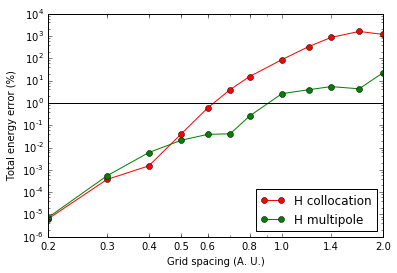

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker

fig1, ax1 = plt.subplots()
ax1.set_xlim([0.2,2.0])
ax1.set_ylim([1.0e-6,1.0e4])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.4, 2.0])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xlabel('Grid spacing (A. U.)')
ax1.set_ylabel('Total energy error (%)')
plt.plot(hgrids['False'],per_e['False'],'ro-',label='H collocation')
plt.plot(hgrids['True'],per_e['True'],'go-',label='H multipole')
plt.plot(hgrids['False'],np.ones_like(hgrids['False']),'k-')
plt.legend(loc=4)
plt.show()

We can see easily the improvement of the total energy for a grid spacing above 0.5 bohr. Preserving the moment of the ionic charge decreases considerably the error associated (see the graph about the [cinchonidine molecule](https://github.com/luigigenovese/BigDFT-nb/blob/master/Multipole-Preserving/multipole-preserving-cinchonidine.ipynb)).